# WAI hackathon 2021

# 1. Setup

In [1]:
# Imports 
import numpy as np
import matplotlib as plt
import seaborn as sns
import matplotlib as mpl
import pandas as pd

# Figure style
plt.style.use('seaborn')
mpl.rc('font', size=13)
mpl.rc('axes', labelsize='large')
mpl.rc('xtick', labelsize='large')
mpl.rc('ytick', labelsize='large')

plt.rcParams['figure.figsize'] = [20, 10] # For larger plots

In [2]:
# Load data
df1 = pd.read_csv("./Data/20200306 Data International Women's Day Viz5 Launch.csv")

In [3]:
df1.head()

,RecordID,Country,Gender,Demographics Question,Demographics Response,Question,Survey Year,Value
0,1,Afghanistan,F,Marital status,Never married,... if she burns the food,01/01/2015,NaN
1,1,Afghanistan,F,Education,Higher,... if she burns the food,01/01/2015,10.1
2,1,Afghanistan,F,Education,Secondary,... if she burns the food,01/01/2015,13.7
3,1,Afghanistan,F,Education,Primary,... if she burns the food,01/01/2015,13.8
4,1,Afghanistan,F,Marital status,"Widowed, divorced, separated",... if she burns the food,01/01/2015,13.8


In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12600 entries, 0 to 12599
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   RecordID               12600 non-null  int64  
 1   Country                12600 non-null  object 
 2   Gender                 12600 non-null  object 
 3   Demographics Question  12600 non-null  object 
 4   Demographics Response  12600 non-null  object 
 5   Question               12600 non-null  object 
 6   Survey Year            12600 non-null  object 
 7   Value                  11187 non-null  float64
dtypes: float64(1), int64(1), object(6)
memory usage: 787.6+ KB


In [5]:
df1['Demographics Question'].unique()

array(['Marital status', 'Education', 'Employment', 'Age', 'Residence'],
      dtype=object)

In [6]:
df1['Question'].unique()

array(['... if she burns the food',
       '... for at least one specific reason',
       '... if she argues with him',
       '... if she goes out without telling him',
       '... if she neglects the children',
       '... if she refuses to have sex with him'], dtype=object)

In [7]:
# Second data set
NY = pd.read_csv('./Data/kpi-domv9a.csv')
NY.head()

,KpiId,KpiName,Value,DataType,Period,StartDate,EndDate,CollectionFrequency
0,DOMV9a,Domestic Violence Incidents Level - Medium Risk,15.00 Number,Number,2011/2012_Apr,2011-04-01,2011-04-30,Monthly
1,DOMV9a,Domestic Violence Incidents Level - Medium Risk,36.00 Number,Number,2011/2012_Q1,2011-04-01,2011-06-30,Monthly
2,DOMV9a,Domestic Violence Incidents Level - Medium Risk,278.00 Number,Number,2011/2012,2011-04-01,2012-03-31,Monthly
3,DOMV9a,Domestic Violence Incidents Level - Medium Risk,9.00 Number,Number,2011/2012_May,2011-05-01,2011-05-31,Monthly
4,DOMV9a,Domestic Violence Incidents Level - Medium Risk,12.00 Number,Number,2011/2012_Jun,2011-06-01,2011-06-30,Monthly


In [8]:
print(NY.KpiId.unique())
print(NY.KpiName.unique())
print(NY.CollectionFrequency.unique())
print(NY.DataType.unique())

['DOMV9a']
['Domestic Violence Incidents Level - Medium Risk']
['Monthly']
['Number']


# Data cleaning for dataset 2 (New York)
The "KpiId", "KpiName", "CollectionFrequency", and "DataType" columns only store one value each. There are redundant: delete!.

"Value" contains the word "Number" which needs to be deleted

In [9]:
# Delete redundant columns
NY.drop(columns=['KpiName', 'KpiId', 'CollectionFrequency', 'DataType'],inplace=True)
NY.head()

,Value,Period,StartDate,EndDate
0,15.00 Number,2011/2012_Apr,2011-04-01,2011-04-30
1,36.00 Number,2011/2012_Q1,2011-04-01,2011-06-30
2,278.00 Number,2011/2012,2011-04-01,2012-03-31
3,9.00 Number,2011/2012_May,2011-05-01,2011-05-31
4,12.00 Number,2011/2012_Jun,2011-06-01,2011-06-30


In [10]:
NY['Value'] = NY['Value'].str.split(' ', expand=True)[0]#.astype(float)
NY['Value'].unique()

array(['15.00', '36.00', '278.00', '9.00', '12.00', '50.00', '16.00',
       '13.00', '21.00', '18.00', '58.00', '27.00', '134.00', '52.00',
       '46.00', '79.00', '31.00', '463.00', '26.00', '22.00', '91.00',
       '33.00', '37.00', '153.00', '57.00', '140.00', '47.00', '43.00',
       '148.00', '621.00', '60.00', '145.00', '63.00', '38.00', '44.00',
       '53.00', '188.00', '69.00', '66.00', '715.00', '51.00', '149.00',
       '200.00', '59.00', '82.00', '56.00', '180.00', '74.00', '62.00',
       '186.00', '54.00', '70.00', '195.00', 'NC', '75.00', nan],
      dtype=object)

# Missing values
Value contains missing values stored as NC or nan.
First, let's replace NC by nan and convert to float. Then let's think about dropping or imputing values

In [11]:
NY['Value'][NY['Value']=='NC'] = np.nan


In [12]:
NY.head()

,Value,Period,StartDate,EndDate
0,15.0,2011/2012_Apr,2011-04-01,2011-04-30
1,36.0,2011/2012_Q1,2011-04-01,2011-06-30
2,278.0,2011/2012,2011-04-01,2012-03-31
3,9.0,2011/2012_May,2011-05-01,2011-05-31
4,12.0,2011/2012_Jun,2011-06-01,2011-06-30


# Data types
Let's convert values to float and dates to date_time objects

In [13]:
NY['Value'] = NY['Value'].astype(float)

In [14]:
NY['StartDate'] = pd.to_datetime(NY['StartDate'])
NY['EndDate'] = pd.to_datetime(NY['EndDate'])

# NY dataset summary

In [15]:
NY.head()

,Value,Period,StartDate,EndDate
0,15.0,2011/2012_Apr,2011-04-01,2011-04-30
1,36.0,2011/2012_Q1,2011-04-01,2011-06-30
2,278.0,2011/2012,2011-04-01,2012-03-31
3,9.0,2011/2012_May,2011-05-01,2011-05-31
4,12.0,2011/2012_Jun,2011-06-01,2011-06-30


In [16]:
NY.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107 entries, 0 to 106
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Value      73 non-null     float64       
 1   Period     107 non-null    object        
 2   StartDate  107 non-null    datetime64[ns]
 3   EndDate    107 non-null    datetime64[ns]
dtypes: datetime64[ns](2), float64(1), object(1)
memory usage: 3.5+ KB


In [18]:
NY['Period'].unique()

array(['2011/2012_Apr', '2011/2012_Q1', '2011/2012', '2011/2012_May',
       '2011/2012_Jun', '2011/2012_Q2', '2011/2012_Jul', '2011/2012_Aug',
       '2011/2012_Sep', '2011/2012_Oct', '2011/2012_Q3', '2011/2012_Nov',
       '2011/2012_Dec', '2011/2012_Q4', '2011/2012_Jan', '2011/2012_Feb',
       '2011/2012_Mar', '2012/2013_Q1', '2012/2013_Apr', '2012/2013',
       '2012/2013_May', '2012/2013_Jun', '2012/2013_Q2', '2012/2013_Jul',
       '2012/2013_Aug', '2012/2013_Sep', '2012/2013_Q3', '2012/2013_Oct',
       '2012/2013_Nov', '2012/2013_Dec', '2012/2013_Jan', '2012/2013_Q4',
       '2012/2013_Feb', '2012/2013_Mar', '2013/2014_Q1', '2013/2014',
       '2013/2014_Apr', '2013/2014_May', '2013/2014_Jun', '2013/2014_Q2',
       '2013/2014_Jul', '2013/2014_Aug', '2013/2014_Sep', '2013/2014_Oct',
       '2013/2014_Q3', '2013/2014_Nov', '2013/2014_Dec', '2013/2014_Jan',
       '2013/2014_Q4', '2013/2014_Feb', '2013/2014_Mar', '2014/2015',
       '2014/2015_Apr', '2014/2015_Q1', '2014/2015_Ma

In [40]:
# Keep only monthly data, i.e. discard Quarterly and annual data
month_list = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
NY = NY[np.array([NY['Period'].str.contains(monthString) for monthString in month_list]).T.sum(axis=1)==1]
NY.head()

,Value,Period,StartDate,EndDate
0,15.0,2011/2012_Apr,2011-04-01,2011-04-30
3,9.0,2011/2012_May,2011-05-01,2011-05-31
4,12.0,2011/2012_Jun,2011-06-01,2011-06-30
6,16.0,2011/2012_Jul,2011-07-01,2011-07-31
7,13.0,2011/2012_Aug,2011-08-01,2011-08-31


<AxesSubplot:xlabel='StartDate', ylabel='Value'>

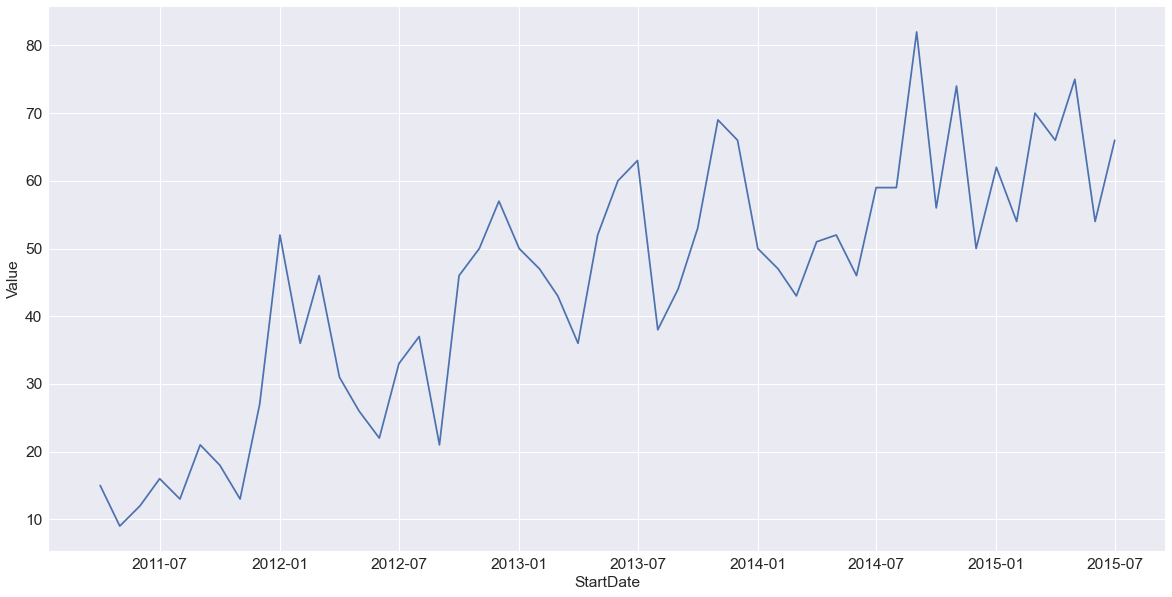

In [41]:
sns.lineplot(data=NY, y='Value', x='StartDate')

Yikes! Numbers keep increasing in New York. Maybe the population also increased? Maybe we should normalize this data

# Third dataset

In [44]:
SC = pd.read_csv('./Data/SafeCity WEB+MOB_Combined - FILE2 - WEB+MOB_Combined.csv')
SC.head()

,ID,MOB/WEB,APPROVED,INCIDENT TITLE,INCIDENT DATE,CREATION DATE,LOCATION,CATEGORY,DESCRIPTION,LATITUDE,LONGITUDE,More Info,CITY
0,13625,Web,YES,cyber bully,"21 Jun 2020, 11 45 AM","08 Jul 2020, 11 47 AM","delhi green park 16 delhi green park 16, Pocke...","Online Harassment,",There is a facebook group of people who bully ...,28.704059,77.102490,NaN,DELHI
1,13624,Web,YES,child sexual abuse,"28 May 2007, 04 00 PM","08 Jul 2020, 11 40 AM","Madangir, New Delhi, Delhi 110017, India","Rape / Sexual Assault,",I am girl. I was child at that time. my uncle ...,28.519922,77.230456,NaN,DELHI
2,13623,Web,YES,Biker followed,"03 Jun 2017, 03 00 AM","03 Jul 2020, 12 48 PM","SBI OFFICERS COLONY, Lawsons Rd, Raja Colony, ...","Others,","It was 3 am in the morning,when I got off the ...",10.806153,78.678887,NaN,NaN
3,13622,Web,YES,Sexual harassment,"17 Jan 2017, 05 09 PM","02 Jul 2020, 05 10 PM","Bihar - Mokama Rd, Laranpur, Bihar 801303, India","Rape / Sexual Assault,",sexual harassment by father - I have faced sex...,25.096074,85.313119,NaN,NaN
4,13621,Web,YES,Domestic Violence,"12 May 2020, 08 00 PM","02 Jul 2020, 05 06 PM","Bihar - Mokama Rd, Laranpur, Bihar 801303, India","Domestic Violence,",My father and brother repeatedly stopped me fr...,25.096074,85.313119,NaN,NaN
